In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

In [3]:
import ipywidgets as widgets

## Central Limit Theorem

In [4]:
population = pd.DataFrame()

# Create an column that is 10000 random numbers drawn from a uniform distribution
population['numbers'] = np.random.uniform(0,10000,size=10000)

In [5]:
population.head()

,numbers
0,5964.940944
1,7952.933117
2,8957.948753
3,4379.076619
4,9495.019130


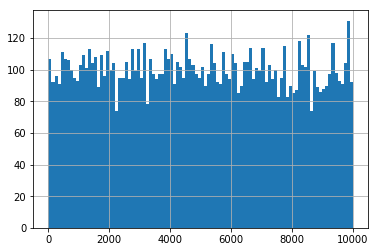

In [6]:
# Plot a histogram of the score data.
# This confirms the data is not a normal distribution. histtype is optional, default is bar, try step or stepfilled
population['numbers'].hist(bins=100, histtype='bar')
plt.show()

In [7]:
population.mean()

numbers    4967.22152
dtype: float64

In [8]:
# View the mean of the numbers
population['numbers'].mean()

4967.221520347444

In [9]:
#just takes a sample from the dataframe with a specified n
my_sample = population.sample(n=100).mean()
my_sample

numbers    5334.313988
dtype: float64

In [10]:
#returns value and data type
my_sample

numbers    5334.313988
dtype: float64

In [11]:
#returns value in an array
my_sample.values

array([5334.3139883])

In [12]:
#returns the value as itself
my_sample.values[0]

5334.313988298457

In [13]:
# Create a list
sampled_means_100 = []

# Take a thousand samples of 100 from the population dataframe
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sample = population.sample(n=100).mean().values[0]
    
    sampled_means_100.append(sample)
    
    

In [14]:
sampled_means_50 = []
# Take a thousand samples of 100 from the population dataframe
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means_50.append(population.sample(n=50).mean().values[0])

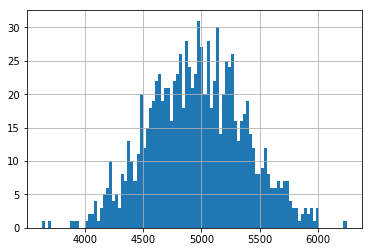

In [15]:
#Can see the difference in distribution when comparing a sample size of 50 to a sample size of 100
pd.Series(sampled_means_50).hist(bins=100)

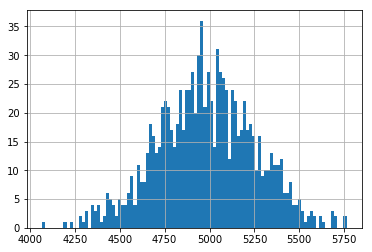

In [16]:
# Plot a histogram of sampled_means. 
# It is clearly normally distributed and centered around 5000, as we would expect for random numbers picked between 0 and 10000

pd.Series(sampled_means_100).hist(bins=100)

In [17]:
# pd.DataFrame(sampled_means).hist(bins=100)
# plt.show()


In [18]:
pd.Series(sampled_means_100).mean()

4980.0862779133095

In [19]:
arr = [2,2,3,9,5,6]
arrX = [1,2,3,4,5,6]

In [20]:
themean = stat.mean(arr)
themean

4.5

In [21]:
sd = stat.stdev(arr)
sd

2.7386127875258306

In [22]:
#array of +/- 3sd values
print([sd*3,sd*-3])

[8.215838362577491, -8.215838362577491]


In [23]:
#array of min and max x values
#thought would be to use min and max to plot the single sd lines
print([min(arrX),max(arrX)])

[1, 6]


### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

In [4]:
#myArr = [1,2,3,3,4,2,5,4]
myArr = list(np.random.randint(50, 100, size=100))

In [39]:
def rando():
    theNum = np.random.randint(50,100)
    return theNum

In [5]:
def testRule1(arr,newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp:
        print(f"Rule 1 Violation. Upper Control Limit (UCL -- mean + 3SD) is {round(sigUp,1)}")
        proceed(newNum)
    elif newNum < sigDown:
        print(f"Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is {round(sigDown,1)}.")
        proceed(newNum)
    else:
        myArr.append(newNum)
        print("New datum added to list")
        print(f"New array: {myArr}")
    keepOn = input("Continue with monitoring (y/n)? \n")
        
    

In [6]:
def proceed(num):
    while True:
        result = input("Add to data set? (y/n) \n")
        if result.lower() not in ('y','n'):
            print('Sorry, not a valid response')
            continue
        else:
            break
    if result == 'y':
        myArr.append(num)
        print("New datum added to list")
     
    

In [8]:
testRule1(myArr,5)

Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is 32.0.
Add to data set? (y/n) 
n
Continue with monitoring (y/n)? 
y


In [25]:
keepGoing = True
while keepGoing:
    question = input("Should I keep going? \n")
    if question == 'n':
        print("Ok, thanks for playing!")
        keepGoing = False

Should I keep going? 
y
Should I keep going? 
n
Ok, thanks for playing!


Rule 2: Two out of three consecutive points fall beyond the 2σ-limit (in zone A or beyond), on the same side of the centerline

In [67]:
#testing whether there are two out of three consecutive numbers above the line
def testRule2(arr, newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    twoSigUp = themean + sd*2
    twoSigDown = themean - sd*2
    arr.append(newNum)
    clipped = np.array(arr)[-3:]
    above2 = clipped > twoSigUp
    below2 = clipped < twoSigDown
    print(f'low: {round(twoSigDown,1)}, high: {round(twoSigUp,1)}')
    if (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2):
        print("Violation")
        print(clipped)
    else:
        print("all good")
    
    

In [68]:
myList = [3,4,3,6,5,4,7,7]

In [69]:
testRule2(myList, 20)

low: 1.6, high: 8.2
all good


In [ ]:
#myArr = [1,2,3,3,4,2,5,4]
myArr = list(np.random.randint(50, 100, size=100))

Rule 3: Four out of five consecutive points fall beyond the 1σ-limit (in zone B or beyond), on the same side of the centerline.

In [78]:
def testRule3(arr, newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    oneSigUp = themean + sd
    oneSigDown = themean - sd
    arr.append(newNum)
    clipped = np.array(arr)[-5:]
    above2 = clipped > oneSigUp
    below2 = clipped < oneSigDown
    print(f'low: {round(oneSigDown,1)}, high: {round(oneSigUp,1)}')
    if (above2.sum(axis=0) >= 4) or (below2.sum(axis=0) >= 4):
        print("Violation")
        print(clipped)
    else:
        print("all good")

In [83]:
rule3List = [3,4,3,6,5,4,7,7,8,10,15,10,10,15]

In [84]:
testRule3(rule3List,15)

low: 3.7, high: 11.6
all good


Rule 4	NINE consecutive points fall on the same side of the centerline (in zone C or beyond)

In [98]:
def testRule4(arr, newNum):
    theMean = stat.mean(arr)
    sd = stat.stdev(arr)
    arr.append(newNum)
    clipped = np.array(arr)[-9:]
    above = clipped > theMean
    below = clipped < theMean
    print(f'mean:{round(theMean,1)}')
    if (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9):
        print("Violation")
        print(clipped)
    else:
        print("all good")

In [103]:
rule4List = [3,4,3,6,5,4,7,7,8,10,15,10,10,15,15,15,15,15]

In [104]:
testRule4(rule4List,15)

mean:9.3
Violation
[15 10 10 15 15 15 15 15 15]
